1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv. 
2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan, <br>
    a. Menggunakan data spam.csv<br>
    b. Fitur CountVectorizer dengan mengaktifkan stop_words<br>
    c. Evaluasi hasilnya<br>
3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,<br>
    a. Menggunakan data spam.csv<br>
    b. Fitur TF-IDF dengan mengaktifkan stop_words<br>
    c. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.<br>
    d. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv<br>

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
df = pd.read_csv('../data/voice.csv', encoding='latin-1')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


#### JAWABAN NO 1

- Melakukan Encoding pada Variabel Label

In [2]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df['label'].head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int32

- Memvisualisasikan dalam bentuk Heatmap

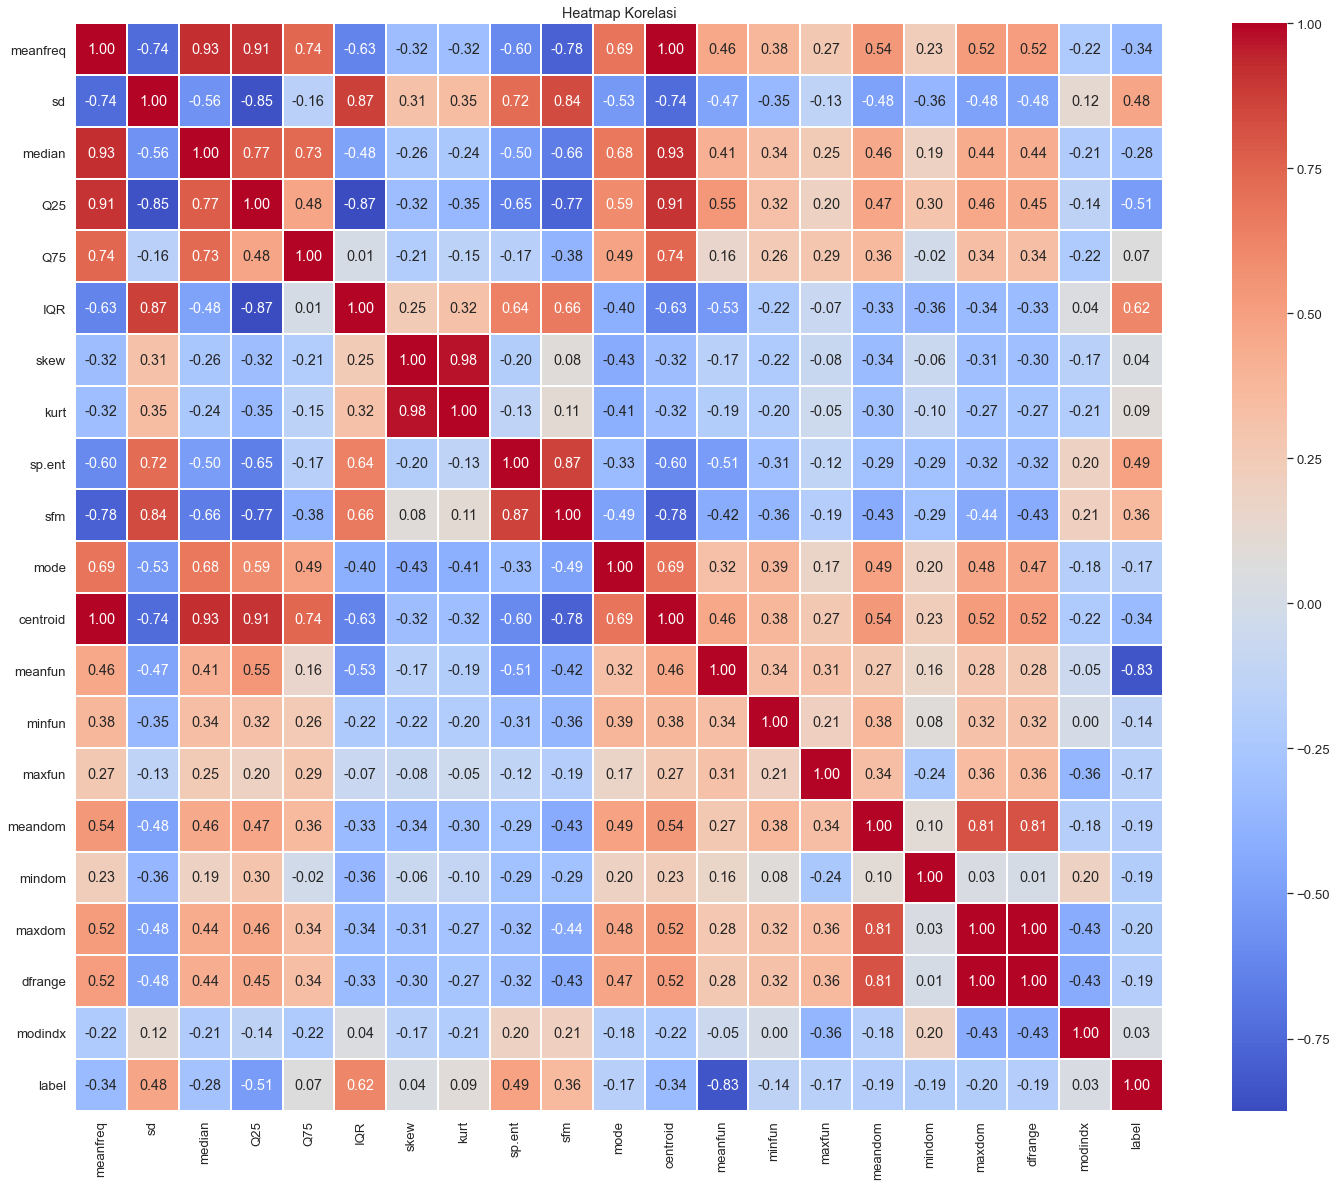

In [3]:
plt.figure(figsize=(25, 20))
corr_matrix = df.corr() 
sns.set(font_scale=1.2) 
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=1, fmt=".2f", annot=True, cbar=True, square=True) 
plt.title('Heatmap Korelasi') 
plt.show()

- Mengidentifikasi Variabel Independen dan Dependen

In [4]:
X = df.iloc[:,:20]
y = df.label

- Membagi Dataset menjadi Data Latih dan Data Uji dengan Proporsi 80:20

In [5]:
from sklearn.model_selection import train_test_split

# Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mendapatkan tipe data dari variabel X yang diubah menjadi bentuk NumPy array
x1 = type(X)
print(x1)

<class 'pandas.core.frame.DataFrame'>


- Melatih Model dengan Data Latih dan Melakukan Prediksi pada Data Uji

In [6]:
# Import Model SVM
from sklearn.svm import SVC
svc_model = SVC(kernel='linear', C=1.0, gamma='scale')

# Latih model dengan data pelatihan
svc_model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = svc_model.predict(X_test)

- Akurasi Model SVM dengan Label Sebenarnya dan Hasil Prediksi

In [7]:
from sklearn.metrics import accuracy_score

# Mengukur akurasi model
accuracy = accuracy_score(y_test, y_pred)

# Menampilkan akurasi
print("Skor Akurasi: {:.2%}".format(accuracy))

Skor Akurasi: 94.16%


#### JAWABAN NO 2

##### a. Menggunakan Data spam.csv

In [8]:
df = pd.read_csv('../data/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


- Drop 3 Kolom Unnamed

In [9]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


- Mengubah Nama v1 dan v2

In [10]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


- Inspeksi Data

In [11]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

ham     4825
spam     747
Name: Labels, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


- Encoding Label

In [12]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


- Memisahkan Fitur dengan Label

In [13]:
X = df['SMS'].values
y = df['Labels'].values

##### b. Fitur CountVectorizer dengan mengaktifkan stop_words

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat objek CountVectorizer dengan stop words
vectorizer = CountVectorizer(stop_words = 'english')

# Fitting dan transform X_train dengan CountVectorizer
X_train = vectorizer.fit_transform(X_train)

# Transform X_test
X_test = vectorizer.transform(X_test)

##### c. Evaluasi Hasil

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi model Multinomial Naive Bayes
mnb = MultinomialNB()

# Latih model dengan data latih
mnb.fit(X_train, y_train)

# Prediksi dengan data latih
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data latih
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data uji
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data uji
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data latih: {acc_train * 100:.2f}%')
print(f'Hasil akurasi data uji: {acc_test * 100:.2f}%')

Hasil akurasi data latih: 99.46%
Hasil akurasi data uji: 98.39%


#### JAWABAN NO 3

##### a. Menggunakan data spam.csv

- Memisahkan Fitur dengan Label

In [16]:
X = df['SMS'].values
y = df['Labels'].values

##### b. Fitur TF-IDF dengan mengaktifkan stop_words

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat objek TfidfVectorizer dengan stop words
tfidf = TfidfVectorizer(stop_words = 'english')

# Fitting dan transform X_train dengan TfidfVectorizer
X_train = tfidf.fit_transform(X_train)

# Transform X_test
X_test = tfidf.transform(X_test)

##### c. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi model Multinomial Naive Bayes
mnb = MultinomialNB()

# Latih model dengan data latih
mnb.fit(X_train, y_train)

# Prediksi dengan data latih
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data latih
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data uji
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data uji
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data latih: {acc_train * 100:.2f}%')
print(f'Hasil akurasi data uji: {acc_test * 100:.2f}%')

Hasil akurasi data latih: 98.38%
Hasil akurasi data uji: 96.68%


##### d. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

- Berdasarkan hasil akurasi dengan penggunaan fitur Countevectorizer dan TF-IDF, maka dapat ditarik kesimpulan 
1. CountVectorizer : <br>
    Akurasi data latih: 99.46%<br>
    Akurasi data uji: 98.39%<br>
    a. Memberikan hasil akurasi yang lebih baik pada data latih maupun data uji <br>
    b. Penggunaan 'stop_words' pada CounteVectorizer membantu mengabaikan kata umum dan tidak relevan yang bisa membuat peningkatan pada akurasi model<br>
2. TF-IDF : <br>
    Hasil akurasi data latih: 98.38%<br>
    Hasil akurasi data uji: 96.68%<br>
    a. Meskipun akurasi data latih masih tinggi, akurasi data uji cenderung lebih rendah dibandingkan dengan CountVectorizer.<br>
    b. Penggunaan stop_words pada TF-IDF juga mengabaikan kata-kata umum, tetapi dalam kasus ini, model mungkin tidak memiliki tingkat generalisasi yang cukup baik pada data yang belum pernah dilihat sebelumnya.<br>
- Berdasarkan akurasi yang lebih tinggi pada data uji, dalam konteks data dan tugas tertentu, penggunaan CountVectorizer dengan 'stop_words' mungkin merupakan pilihan yang lebih baik. Namun, sangat penting untuk memahami bahwa akurasi tidaklah satu-satunya metrik yang harus dipertimbangkan